# Exploratory Data Analysis for Credit scoring system



### What is a Credit Scoring System?

A **Credit Scoring System** is a financial tool used to evaluate the creditworthiness of individuals or businesses applying for loans or credit. It is a quantitative assessment of a person’s ability and likelihood to repay debt based on several financial and behavioral factors. The credit score, typically a three-digit number, summarizes a person’s credit history and predicts the risk associated with lending to them.

The system takes into account multiple factors, including:
- **Payment History**: Whether an individual pays their bills on time.
- **Credit Utilization**: The percentage of available credit currently being used.
- **Length of Credit History**: How long the individual has maintained credit accounts.
- **Types of Credit Used**: Credit cards, mortgages, auto loans, etc.
- **Recent Credit Inquiries**: Whether the individual has applied for new credit recently.

Credit scoring models use these factors to generate a score, which lenders use to make decisions about whether to approve or deny credit applications, as well as to determine loan terms (interest rates, loan limits, etc.).

## Standard package imports

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE


In [28]:


# Load the dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
column_names = ['Existing Checking Account', 'Duration', 'Credit History', 'Purpose',
                'Credit Amount', 'Savings Account', 'Employment Since', 'Installment Rate',
                'Personal Status and Sex', 'Other Debtors', 'Residence Since',
                'Property', 'Age', 'Other Installment Plans', 'Housing', 'Existing Credits',
                'Job', 'Liable Persons', 'Telephone', 'Foreign Worker', 'Target']
df = pd.read_csv(url, delim_whitespace=True, names=column_names)

# Display first few rows
print('\nSample records of the dataset\n')
print(df.head())

# Check the structure of the dataset
print('\nStructure of the dataset\n')
print(df.info())

# Check for missing values
print('\nMissing value count\n')
print(df.isnull().sum())

# Summary statistics for numeric features
print('\nStats about the numerical features\n')
print(df.describe())

# Unique values in categorical columns
print('\nUnique value count of Categorical columns\n')
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col} has {df[col].nunique()} unique values')



Sample records of the dataset

  Existing Checking Account  Duration Credit History Purpose  Credit Amount  \
0                       A11         6            A34     A43           1169   
1                       A12        48            A32     A43           5951   
2                       A14        12            A34     A46           2096   
3                       A11        42            A32     A42           7882   
4                       A11        24            A33     A40           4870   

  Savings Account Employment Since  Installment Rate Personal Status and Sex  \
0             A65              A75                 4                     A93   
1             A61              A73                 2                     A92   
2             A61              A74                 2                     A93   
3             A61              A74                 2                     A93   
4             A61              A73                 3                     A93   

  Other Debt

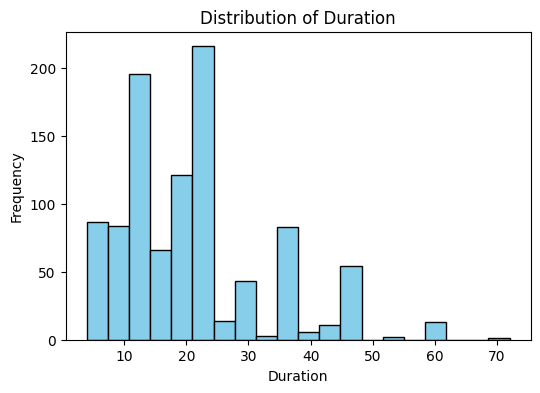

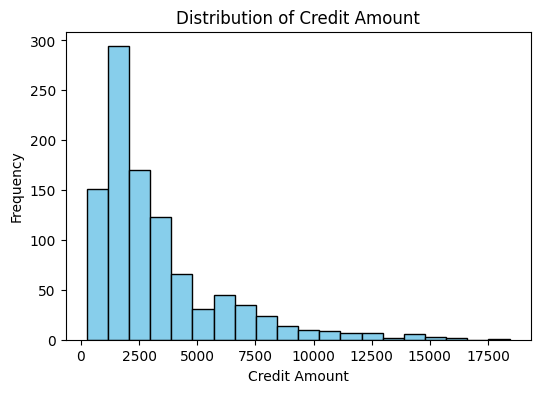

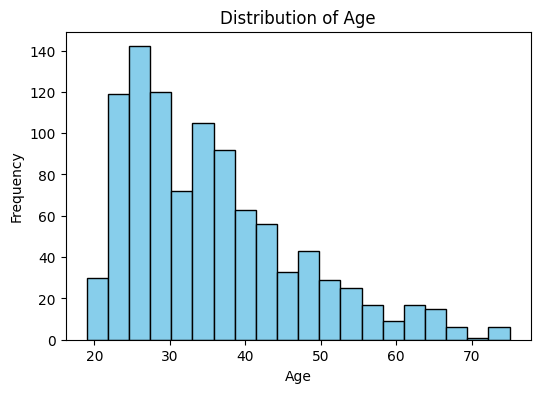

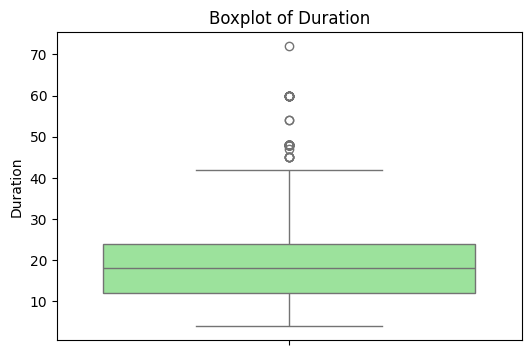

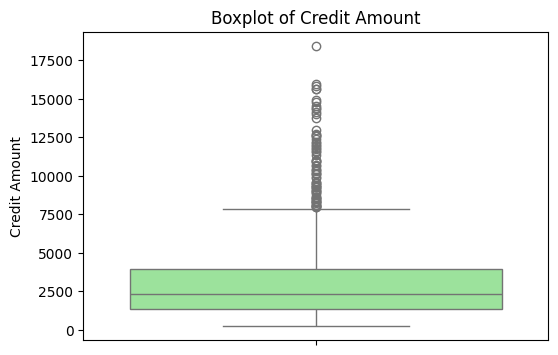

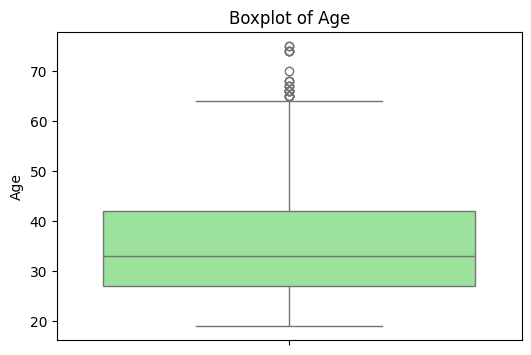

<ipython-input-29-7544396c0c18>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')


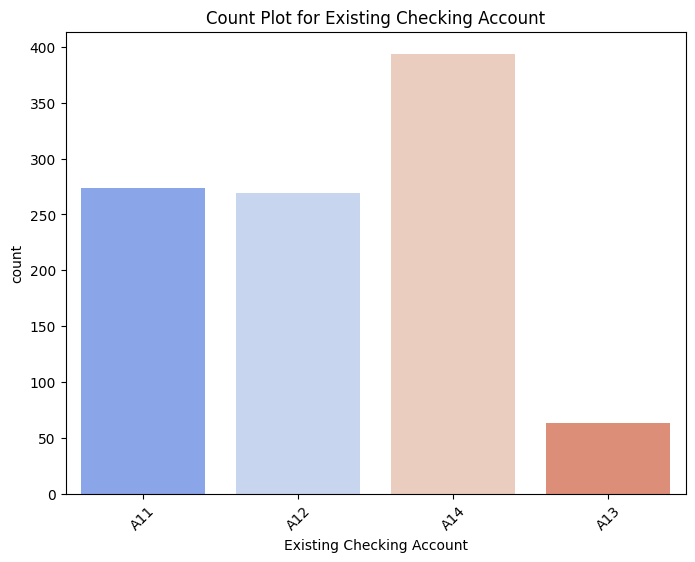

<ipython-input-29-7544396c0c18>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')


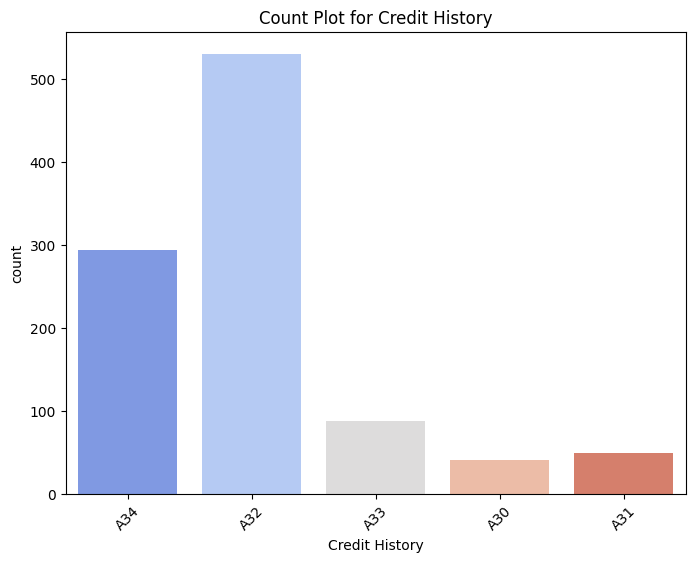

<ipython-input-29-7544396c0c18>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')


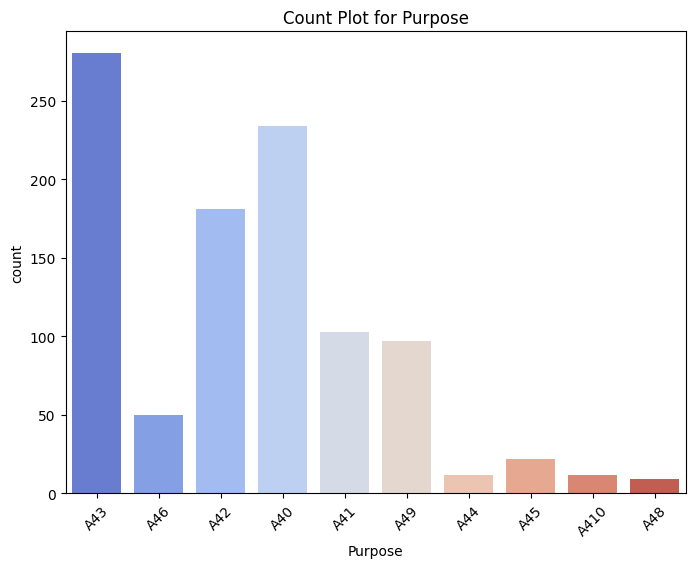

<ipython-input-29-7544396c0c18>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')


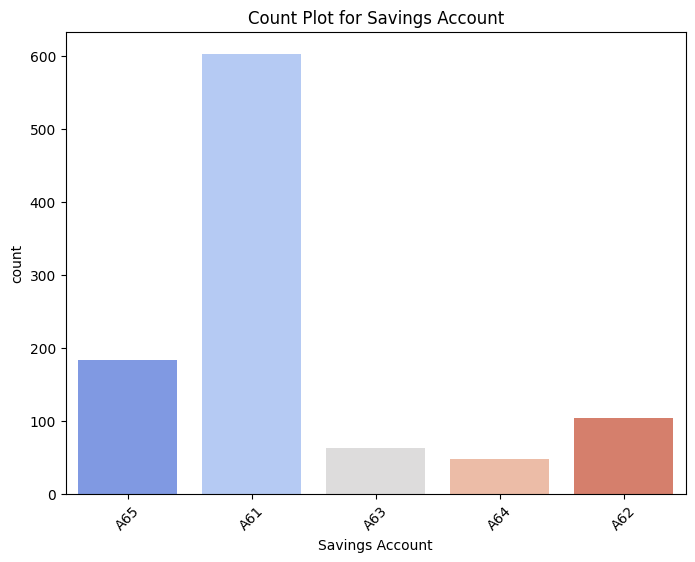

<ipython-input-29-7544396c0c18>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')


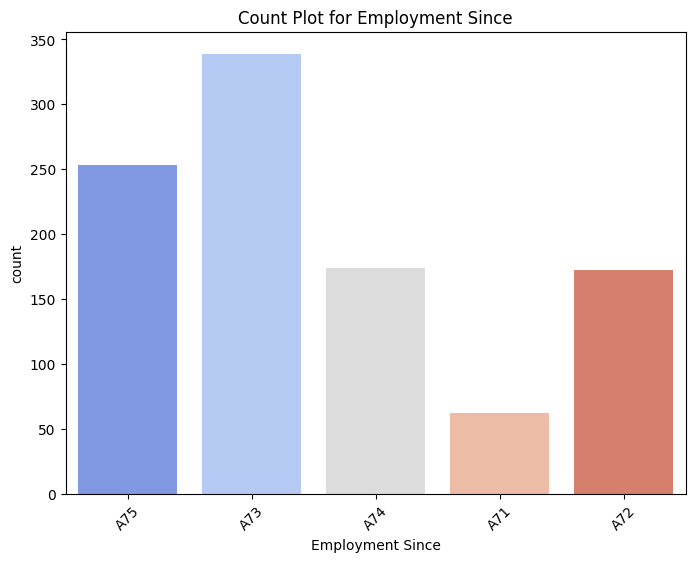

<ipython-input-29-7544396c0c18>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')


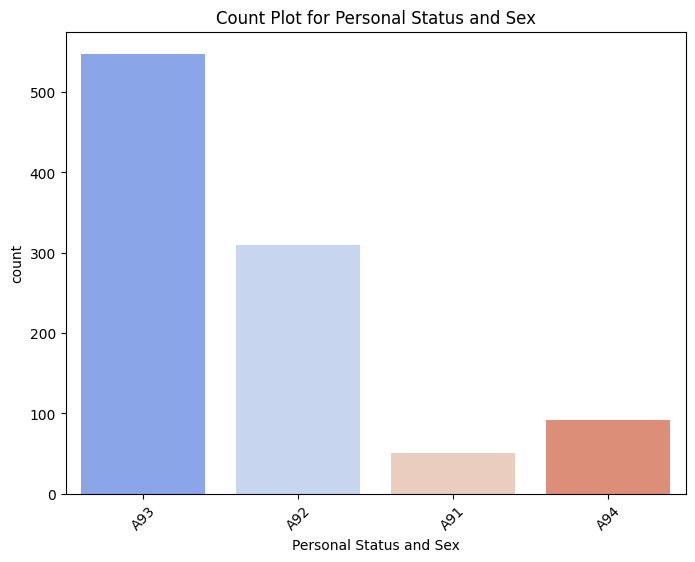

<ipython-input-29-7544396c0c18>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')


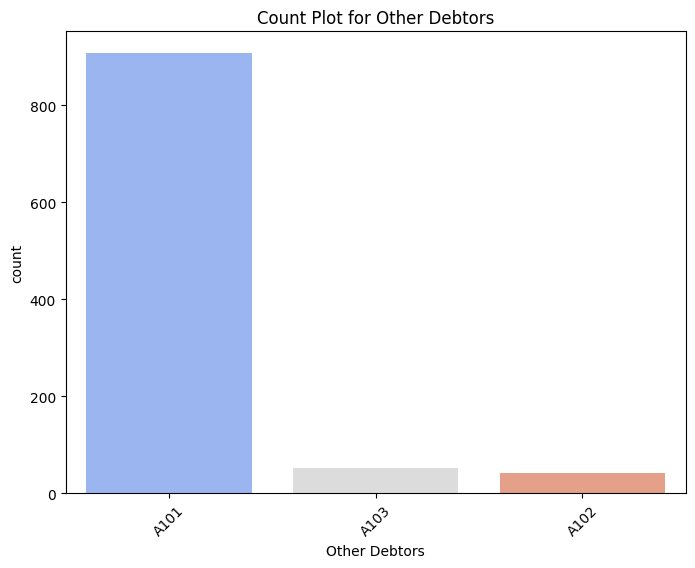

<ipython-input-29-7544396c0c18>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')


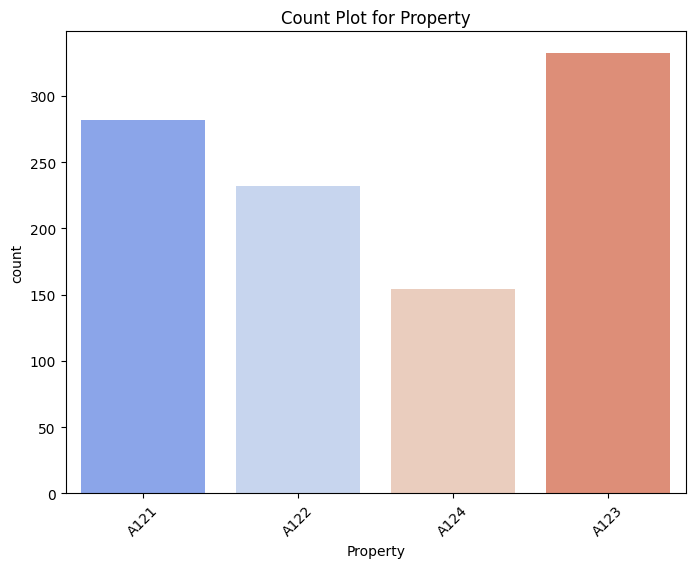

<ipython-input-29-7544396c0c18>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')


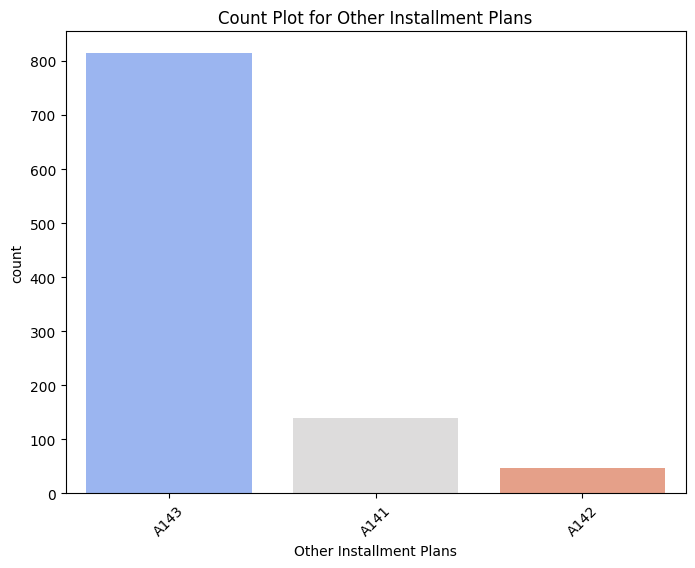

<ipython-input-29-7544396c0c18>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')


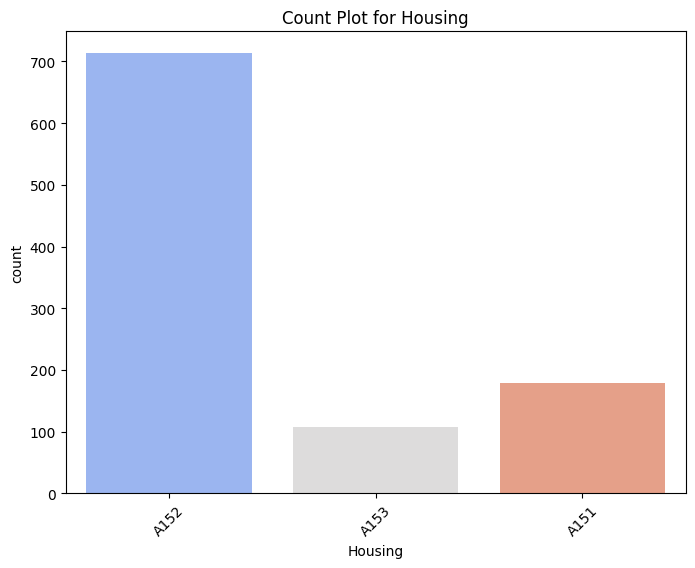

<ipython-input-29-7544396c0c18>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')


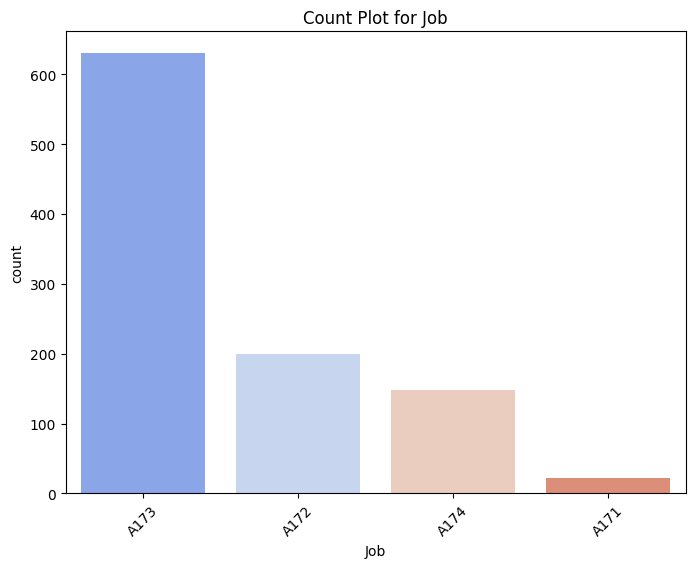

<ipython-input-29-7544396c0c18>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')


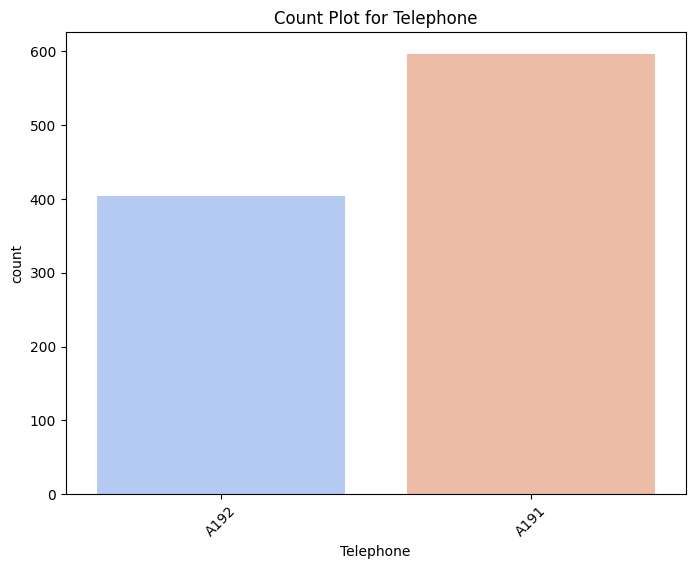

<ipython-input-29-7544396c0c18>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='coolwarm')


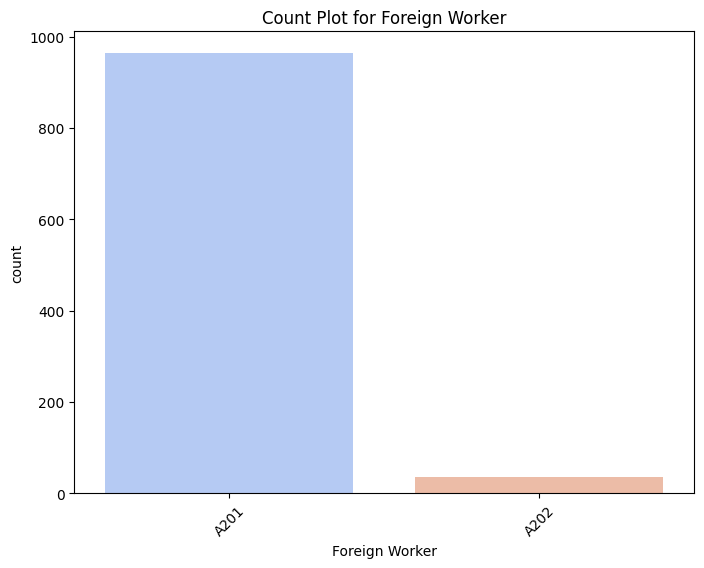

In [29]:
# Plotting histograms for numeric features
numeric_columns = ['Duration', 'Credit Amount', 'Age']

for col in numeric_columns:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    fname = col.replace(" ","")
    plt.savefig(f'/content/credit_scoring/images/1_Distribution_of_{fname}.png',dpi=None)
    plt.show()

# Boxplots for numeric features to identify outliers
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    fname = col.replace(" ","")
    plt.savefig(f'/content/credit_scoring/images/2_box_plot_of_{fname}.png',dpi=None)
    plt.show()

# Bar plots for categorical variables
categorical_columns = ['Existing Checking Account', 'Credit History', 'Purpose', 'Savings Account',
                       'Employment Since', 'Personal Status and Sex', 'Other Debtors', 'Property',
                       'Other Installment Plans', 'Housing', 'Job', 'Telephone', 'Foreign Worker']

for col in categorical_columns:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, data=df, palette='coolwarm')
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)
    fname = col.replace(" ","")
    plt.savefig(f'/content/credit_scoring/images/3_count_plot_of_{fname}.png',dpi=None)
    plt.show()


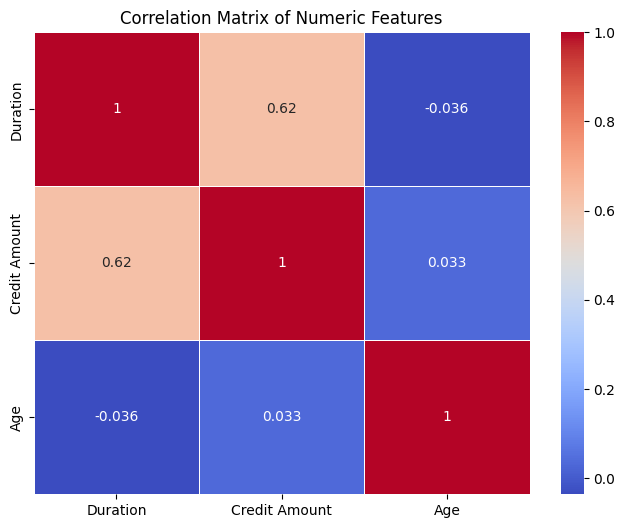

<ipython-input-30-b2759c365833>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y='Credit Amount', data=df, palette='viridis')


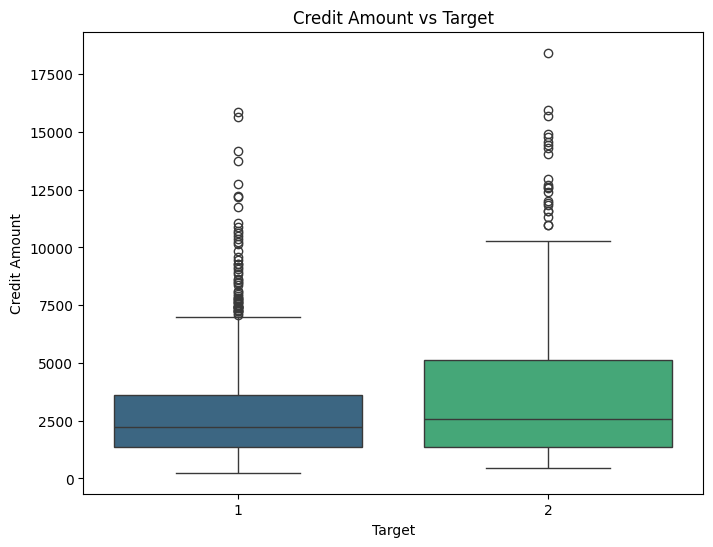

In [30]:
# Correlation heatmap for numeric features
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.savefig(f'/content/credit_scoring/images/4_heatmap_numeric_feature.png',dpi=None)
plt.show()

# Boxplot of Credit Amount by Target (to check if creditworthiness affects credit amount)
plt.figure(figsize=(8,6))
sns.boxplot(x='Target', y='Credit Amount', data=df, palette='viridis')
plt.title('Credit Amount vs Target')
plt.savefig(f'/content/credit_scoring/images/5_boxplot_credit_target.png',dpi=None)
plt.show()




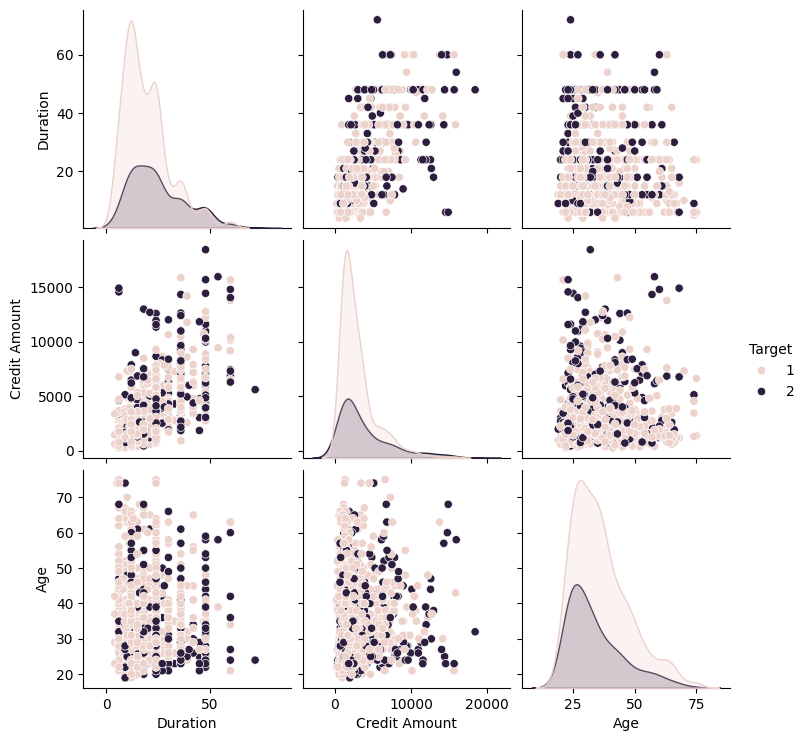

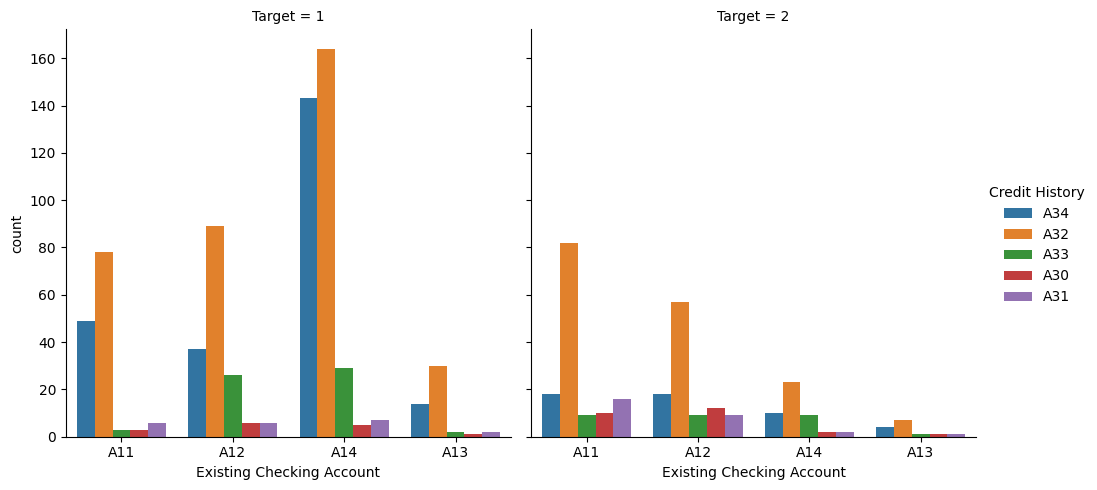

In [31]:
# Pairplot for selected numeric features to observe their relationship
sns.pairplot(df, hue='Target', vars=['Duration', 'Credit Amount', 'Age'])
plt.savefig(f'/content/credit_scoring/images/6_pairplot_numeric_target.png',dpi=None)
plt.show()

# Checking the interaction between two categorical variables with respect to the target variable
sns.catplot(x="Existing Checking Account", hue="Credit History", col="Target", data=df, kind="count", height=5, aspect=1)
plt.savefig(f'/content/credit_scoring/images/7_pairplot_categorical_target.png',dpi=None)
plt.show()


In [32]:
# Separate numerical and categorical features
numerical_features = ['Duration', 'Credit Amount', 'Installment Rate', 'Residence Since', 'Age', 'Existing Credits']

# Convert categorical variables to numeric using Label Encoding
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

# Encode the target variable (1 for "good" credit, 2 for "bad" credit)
df['Target'] = df['Target'].map({1: 1, 2: 0})  # 1 indicates good credit risk, 0 indicates bad

# Split data into features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Verify the target varible
print(y.value_counts())
print(y.dtypes)

Target
1    700
0    300
Name: count, dtype: int64
int64


In [33]:
# Handling class imbalance with SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'k-NN': KNeighborsClassifier()
}

# Train each model and store results
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Store metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_prob': y_prob
    }

    # Print classification report
    print(f'Classification Report for {name}:')
    print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       202
           1       0.85      0.79      0.82       218

    accuracy                           0.82       420
   macro avg       0.82      0.82      0.82       420
weighted avg       0.82      0.82      0.82       420

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.69      0.82      0.75       202
           1       0.80      0.67      0.72       218

    accuracy                           0.74       420
   macro avg       0.74      0.74      0.74       420
weighted avg       0.75      0.74      0.74       420

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       202
           1       0.85      0.79      0.82       218

    accuracy                           0.82       420

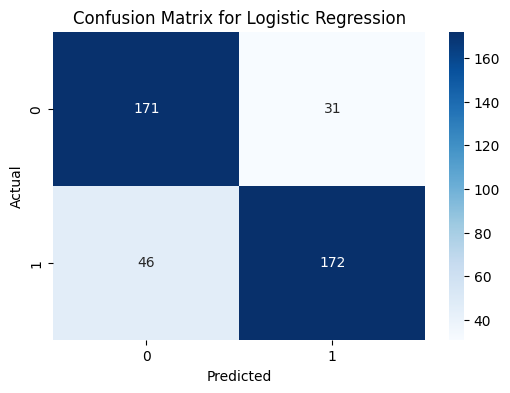

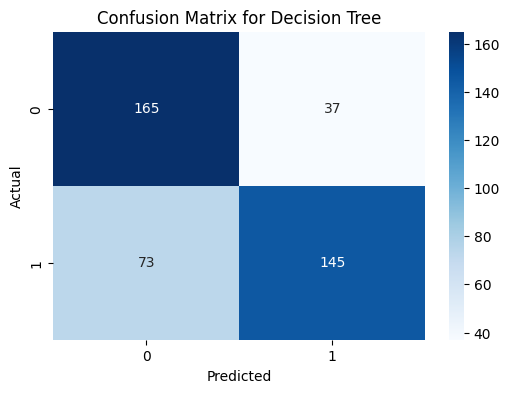

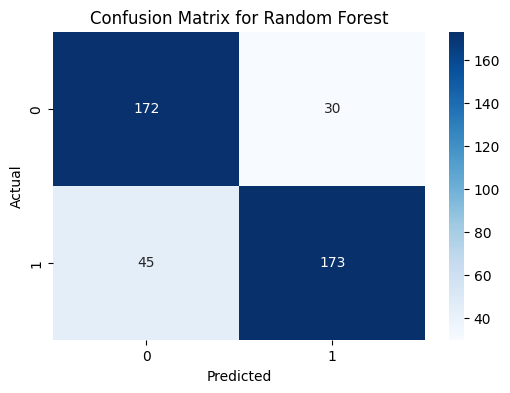

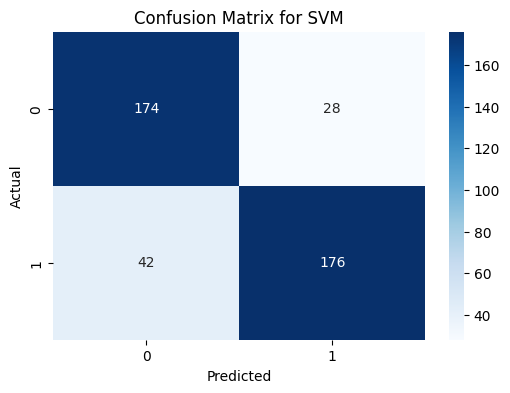

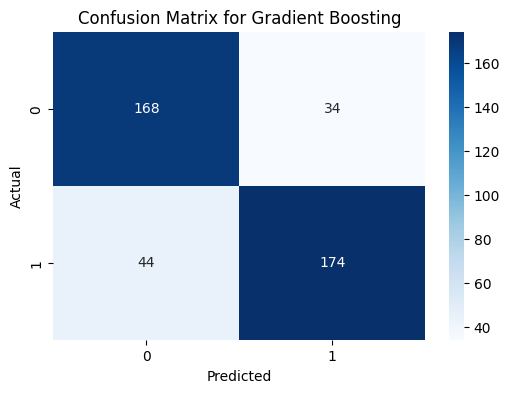

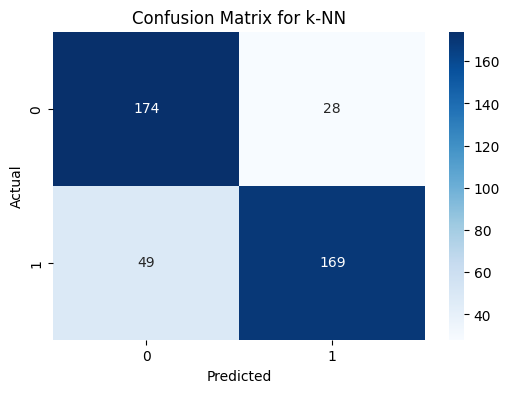

In [35]:
for name, result in results.items():
    cm = confusion_matrix(y_test, result['y_pred'])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'/content/credit_scoring/images/8_confusion_matrix_{name}.png',dpi=None)
    plt.show()


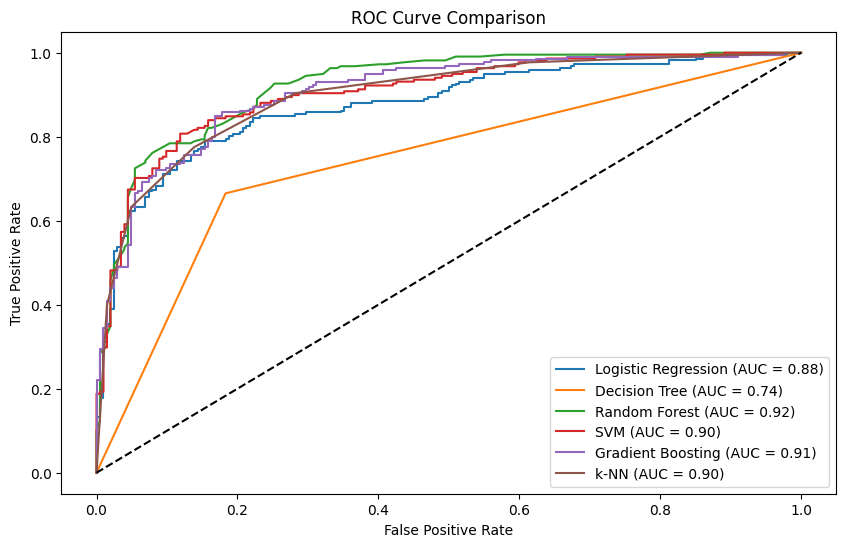

In [36]:
plt.figure(figsize=(10, 6))

for name, result in results.items():
    if result['y_prob'] is not None:  # Check if the model provides probability predictions
        fpr, tpr, _ = roc_curve(y_test, result['y_prob'])
        auc_score = roc_auc_score(y_test, result['y_prob'])
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.savefig(f'/content/credit_scoring/images/9_roc_curve.png',dpi=None)
plt.show()


<ipython-input-37-67d6a3a9b760>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')


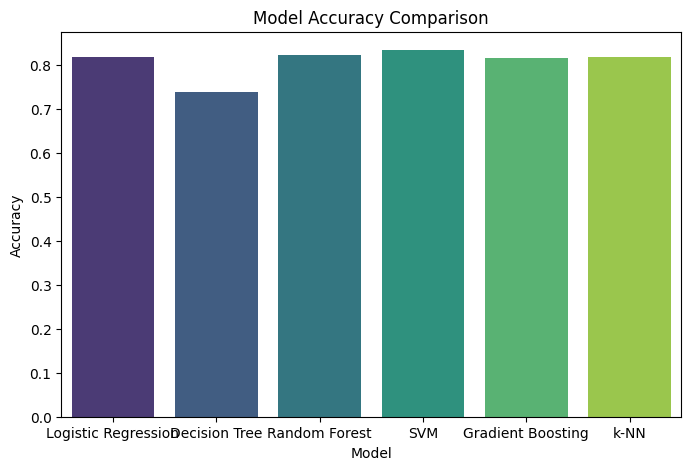

In [37]:
accuracies = {name: result['accuracy'] for name, result in results.items()}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.savefig(f'/content/credit_scoring/images/10_bar_plot_model_comparison.png',dpi=None)
plt.show()
